In [3]:
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPool2D, BatchNormalization, Dropout
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import os
import tensorflow as tf
from tensorflow import keras

**PURELY CONVOLUTIONAL (ONLY CONV LAYERS)**

In [4]:
baseModel = keras.applications.VGG16(weights='imagenet', input_shape=(224,224,3), include_top=False)
baseModel.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [5]:
baseModel.trainable = False
inputs = keras.Input(shape=(224,224,3))

x = baseModel(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(8)(x)

model = keras.Model(inputs, outputs, name='pretrained_vgg16')
model.summary()

Model: "pretrained_vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 4104      
Total params: 14,718,792
Trainable params: 4,104
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
#image preprocessing
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

batch_size = 128
base_dir = "../input/project-dataset/Plant_Dataset/New Plant Diseases Dataset(Augmented)"

training_set = train_datagen.flow_from_directory(base_dir + '/train',
                                                target_size = (224,224),
                                                batch_size = batch_size,
                                                class_mode = 'categorical'
                                                )
valid_set = valid_datagen.flow_from_directory(base_dir + '/valid',
                                                target_size = (224,224),
                                                batch_size = batch_size,
                                                class_mode = 'categorical'
                                              )

Found 15087 images belonging to 8 classes.
Found 3772 images belonging to 8 classes.


In [7]:
all_categories = training_set.class_indices
all_categories

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 4,
 'Corn_(maize)___Common_rust_': 5,
 'Corn_(maize)___Northern_Leaf_Blight': 6,
 'Corn_(maize)___healthy': 7}

In [8]:
list_of_all_categories = list(all_categories)
list_of_all_categories

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy']

In [9]:
train_num = training_set.samples
valid_num = valid_set.samples
print(train_num,valid_num)

15087 3772


In [10]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=[keras.metrics.CategoricalAccuracy()])
history = model.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set,
                               epochs=18, validation_steps=valid_num//batch_size)

Epoch 1/18
117/117 [==============================] - 138s 1s/step - loss: 1.9492 - categorical_accuracy: 0.2941 - val_loss: 1.3494 - val_categorical_accuracy: 0.7500
Epoch 2/18
117/117 [==============================] - 67s 572ms/step - loss: 1.2567 - categorical_accuracy: 0.7145 - val_loss: 0.9741 - val_categorical_accuracy: 0.8475
Epoch 3/18
117/117 [==============================] - 66s 562ms/step - loss: 0.9437 - categorical_accuracy: 0.8137 - val_loss: 0.7783 - val_categorical_accuracy: 0.8567
Epoch 4/18
117/117 [==============================] - 67s 569ms/step - loss: 0.7788 - categorical_accuracy: 0.8416 - val_loss: 0.6573 - val_categorical_accuracy: 0.8766
Epoch 5/18
117/117 [==============================] - 67s 573ms/step - loss: 0.6633 - categorical_accuracy: 0.8550 - val_loss: 0.5741 - val_categorical_accuracy: 0.8823
Epoch 6/18
117/117 [==============================] - 67s 573ms/step - loss: 0.5975 - categorical_accuracy: 0.8592 - val_loss: 0.5138 - val_categorical_accur

Text(0, 0.5, 'Accuracy')

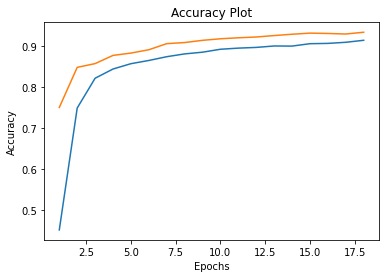

In [11]:
train_accuracy = history.history['categorical_accuracy']
val_accuracy = history.history['val_categorical_accuracy']
import matplotlib.pyplot as plt

epochs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

plt.plot(epochs, train_accuracy, label='train acc')
plt.plot(epochs, val_accuracy, label='val acc')
plt.title("Accuracy Plot")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [12]:
model.evaluate(valid_set)

30/30 [==============================] - 14s 473ms/step - loss: 0.2662 - categorical_accuracy: 0.9332


[0.26620030403137207, 0.9331919550895691]

In [13]:
prediction = model.predict(valid_set)
prediction[0]

array([-2.9897716, -1.2525553, -5.9218116, -3.5111685, -3.1787262,
        6.066336 , -1.6558716, -8.438996 ], dtype=float32)

In [14]:
prediction_array = []
for i in prediction:
  max_prob = max(i)
  for j in range(8):
    if i[j] == max_prob:
      prediction_array.append(list_of_all_categories[j])
prediction_array[100:150]

['Corn_(maize)___healthy',
 'Apple___healthy',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Apple___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Apple___Black_rot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Apple___Cedar_apple_rust',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Apple___Cedar_apple_rust',
 'Corn_(maize)___Common_rust_',
 'Apple___healthy',
 'Apple___Cedar_apple_rust',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(m

In [ ]:
model.save('imported_model.h5')

**MIXED(CNN WITH DENSE LAYERS)**

In [12]:
model2 = Sequential()

model2.add(Conv2D(input_shape=[224,224,3], filters=64,kernel_size=[3,3], padding='same', activation='relu'))
model2.add(Conv2D(filters=64,kernel_size=[3,3], padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=[2,2], strides=[2,2]))

model2.add(Conv2D(filters=64,kernel_size=[3,3], padding='same', activation='relu'))
model2.add(BatchNormalization())



model2.add(MaxPool2D(pool_size=[2,2], strides=[2,2]))

model2.add(Conv2D(filters=128,kernel_size=[3,3], padding='same', activation='relu'))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=128,kernel_size=[3,3], padding='same', activation='relu'))
model2.add(BatchNormalization())



model2.add(MaxPool2D(pool_size=[2,2], strides=[2,2]))

model2.add(Conv2D(filters=256,kernel_size=[3,3], padding='same', activation='relu'))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=256,kernel_size=[3,3], padding='same', activation='relu'))
model2.add(BatchNormalization())


model2.add(MaxPool2D(pool_size=[2,2], strides=[2,2]))

model2.add(Conv2D(filters=512,kernel_size=[3,3], padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=512,kernel_size=[3,3], padding='same', activation='relu'))
model2.add(BatchNormalization())

model2.add(MaxPool2D(pool_size=[2,2], strides=[2,2]))

model2.add(Flatten())
model2.add(Dense(units=256,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(units=128,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(units=64,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(units=32,activation='relu'))
model2.add(BatchNormalization())


model2.add(Dense(units=8, activation="softmax"))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
batch_normalization_26 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 56, 56, 128)      

In [13]:
model2.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=[keras.metrics.CategoricalAccuracy()])
history2 = model2.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set,
                               epochs=18, validation_steps=valid_num//batch_size)

Epoch 1/18
117/117 [==============================] - 70s 577ms/step - loss: 0.6794 - categorical_accuracy: 0.7892 - val_loss: 3.5278 - val_categorical_accuracy: 0.1837
Epoch 2/18
117/117 [==============================] - 67s 569ms/step - loss: 0.1209 - categorical_accuracy: 0.9644 - val_loss: 4.1877 - val_categorical_accuracy: 0.2109
Epoch 3/18
117/117 [==============================] - 68s 579ms/step - loss: 0.0850 - categorical_accuracy: 0.9733 - val_loss: 2.4899 - val_categorical_accuracy: 0.4173
Epoch 4/18
117/117 [==============================] - 67s 574ms/step - loss: 0.0708 - categorical_accuracy: 0.9791 - val_loss: 6.1125 - val_categorical_accuracy: 0.2241
Epoch 5/18
117/117 [==============================] - 68s 578ms/step - loss: 0.0664 - categorical_accuracy: 0.9780 - val_loss: 0.7206 - val_categorical_accuracy: 0.8214
Epoch 6/18
117/117 [==============================] - 68s 577ms/step - loss: 0.0424 - categorical_accuracy: 0.9856 - val_loss: 0.3775 - val_categorical_acc

Text(0, 0.5, 'Accuracy')

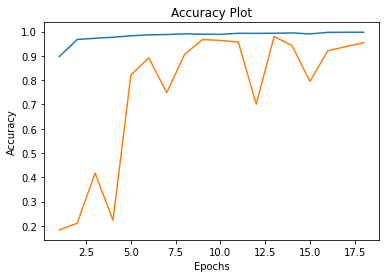

In [16]:
train_accuracy2 = history2.history['categorical_accuracy']
val_accuracy2 = history2.history['val_categorical_accuracy']
import matplotlib.pyplot as plt

epochs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

plt.plot(epochs, train_accuracy2, label='train acc')
plt.plot(epochs, val_accuracy2, label='val acc')
plt.title("Accuracy Plot")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [17]:
model2.evaluate(valid_set)

30/30 [==============================] - 12s 403ms/step - loss: 0.1661 - categorical_accuracy: 0.9544


[0.16610999405384064, 0.9544008374214172]

In [18]:
model2.save('mixed_model.h5')

**PURELY DNN (ONLY DENSE LAYERS)**

In [29]:
model3 = Sequential()

model3.add(Conv2D(input_shape=[224,224,3], filters=64,kernel_size=[3,3], padding='same', activation='relu'))
model3.add(Flatten())
model3.add(Dense(units=9,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(units=32,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(units=64,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(units=128,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(units=256,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(units=512,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(units=1024,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(units=64,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(units=32,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(units=8, activation="softmax"))
model3.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
flatten_12 (Flatten)         (None, 3211264)           0         
_________________________________________________________________
dense_83 (Dense)             (None, 9)                 28901385  
_________________________________________________________________
batch_normalization_100 (Bat (None, 9)                 36        
_________________________________________________________________
dense_84 (Dense)             (None, 32)                320       
_________________________________________________________________
batch_normalization_101 (Bat (None, 32)                128       
_________________________________________________________________
dense_85 (Dense)             (None, 64)              

In [30]:
model3.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=[keras.metrics.CategoricalAccuracy()])
history = model3.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set,
                               epochs=18, validation_steps=valid_num//batch_size)

Epoch 1/18
117/117 [==============================] - 61s 504ms/step - loss: 1.2842 - categorical_accuracy: 0.5296 - val_loss: 2.1371 - val_categorical_accuracy: 0.2532
Epoch 2/18
117/117 [==============================] - 59s 502ms/step - loss: 0.3652 - categorical_accuracy: 0.8767 - val_loss: 1.3549 - val_categorical_accuracy: 0.5469
Epoch 3/18
117/117 [==============================] - 58s 495ms/step - loss: 0.2099 - categorical_accuracy: 0.9290 - val_loss: 0.6124 - val_categorical_accuracy: 0.7936
Epoch 4/18
117/117 [==============================] - 59s 503ms/step - loss: 0.1511 - categorical_accuracy: 0.9489 - val_loss: 1.4673 - val_categorical_accuracy: 0.6282
Epoch 5/18
117/117 [==============================] - 58s 500ms/step - loss: 0.0987 - categorical_accuracy: 0.9687 - val_loss: 1.0317 - val_categorical_accuracy: 0.6913
Epoch 6/18
117/117 [==============================] - 58s 499ms/step - loss: 0.0759 - categorical_accuracy: 0.9774 - val_loss: 0.3566 - val_categorical_acc

Text(0, 0.5, 'Accuracy')

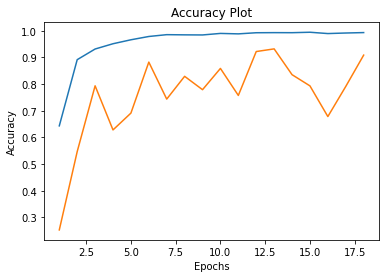

In [31]:
train_accuracy3 = history.history['categorical_accuracy']
val_accuracy3 = history.history['val_categorical_accuracy']
import matplotlib.pyplot as plt

epochs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

plt.plot(epochs, train_accuracy3, label='train acc')
plt.plot(epochs, val_accuracy3, label='val acc')
plt.title("Accuracy Plot")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')